# Hernquist distribution
The aim of this notebook is to generate an unperturbed Hernquist distribution. We will then add two extra points which will simulate two black holes, to study the dynamical friction and their interaction.

The Henrquist profile is described by the follwing density distribution:

$$ \rho(r) = \frac{M}{2\pi}\frac{a}{r}\frac{1}{(r+a)^3} $$   
where $a$ is a scale radius. Note that for radii larger than $a$, the density goes as $r^{-4}$, at smaller radii it will instead go as r.

From the density distribution one can compute the mass distribution and the potential shape, assuming a spherical distribution. 

$$ M(R) = \int_0^R 4\pi r^2 \rho(r) dr  = \frac{M_{tot}R^2}{(R+a)^2}$$

$$ \phi_H (R) = -4\pi G\Bigl[\frac{1}{R} \int_0^R \rho(r) r^2 dr + \int_R^\infty \rho(r) r dr\Bigr] = - \frac{GM}{(R+a)}$$

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

import scienceplots
plt.style.use(['science', 'no-latex'])

## Initialization

In [48]:
n = 5000 #number of particles
a = 5 #scale radius
M = n #each particle has a mass = 1 in internal units

## Position sampling
In order to create the profile, we need to sample the position and velociy of each of our n particles. To do this, we first find the radial distribution:

$$ P(R) = \frac{M(R)}{M_{tot}} = \frac{R^2}{(R + a)^2} $$

where $0 < P(R) < 1$. In this way we can sample from a uniform distribution and then convert that value into a radius:

$$ R = \frac{a\sqrt{P(R)}}{1-\sqrt{P(R)}}$$

Assuming spherical symmetry, the angular positions can instead be generated from:


$$ \Theta = \arccos{(1-2P(\Theta))}$$

$$ \Phi = {2\pi}P(\Phi)$$

where P once again is drawn from a uniform distribution.

In [37]:
def radius_from_P (P):
    return (a * np.sqrt(P)) / (1 - np.sqrt(P))

In [38]:
#samples ---------------------------------
P_R = np.random.uniform(0, 1, n)
radius = radius_from_P (P_R)
radius_s = np.sort(radius)

P_theta = np.random.uniform(0, 1, n)
theta = np.arccos(1 - 2*P_theta)

P_phi = np.random.uniform(0, 1, n)
phi = 2 * np.pi * P_phi

C:\Users\lm101\AppData\Local\Temp\ipykernel_11376\4100112749.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


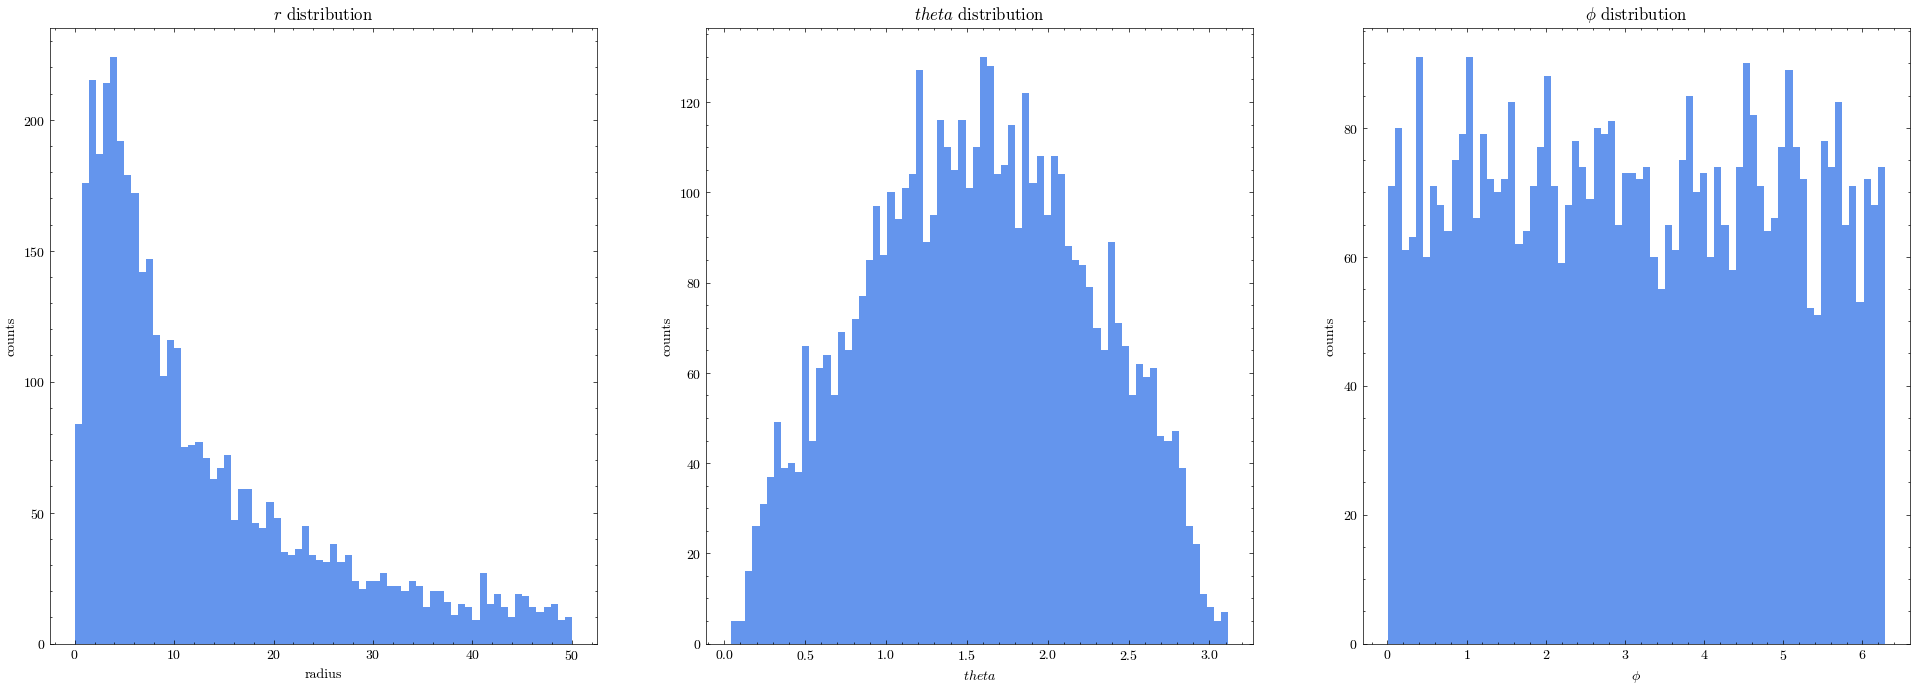

In [39]:
fig,ax = plt.subplots(ncols=3,nrows=1,figsize=(24,8))
ax[0].hist(radius_s, range=(0,50), bins = int(np.sqrt(n)), color = 'cornflowerblue')
ax[0].set(title = '$r$ distribution', ylabel = "counts", xlabel = "radius")

ax[1].hist(theta, bins = int(np.sqrt(n)), color = 'cornflowerblue')
ax[1].set(title = '$theta$ distribution', ylabel = "counts", xlabel = "$theta$")
ax[1].plot()

ax[2].hist(phi, bins = int(np.sqrt(n)), color = 'cornflowerblue')
ax[2].set(title = '$\phi$ distribution', ylabel = "counts", xlabel = "$\phi$")
ax[2].plot()

fig.show()

In [45]:
#carthesian coord conversion -----------
def sph_to_carth (radius, theta, phi):
    x = radius * np.sin(theta) * np.cos(phi)
    y = radius * np.sin(theta) * np.sin(phi)
    z = radius * np.cos(theta)
    return x, y, z

C:\Users\lm101\AppData\Local\Temp\ipykernel_11376\841453379.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


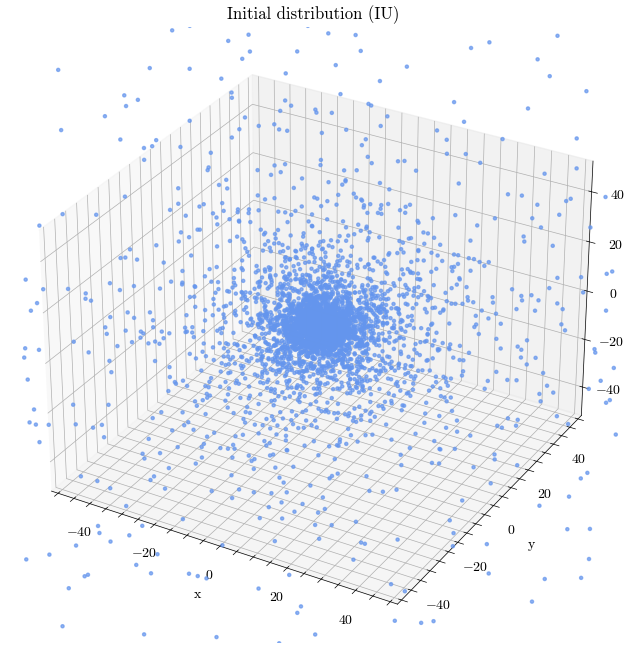

In [47]:
x, y, z = sph_to_carth(radius, theta, phi)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(x,y,z,s=5,alpha=0.7, color = 'cornflowerblue')
ax.set (title = 'Initial distribution (IU)', xlabel = 'x', ylabel = 'y', zlabel = 'z', xlim = (-50,50), ylim = (-50, 50), zlim = (-50, 50))

fig.show()

## Velocity sampling
To sample our velocities, we first need to compute the distribution function $f$ through the Eddington formula:
$$ f(\varepsilon) = \frac{1}{\sqrt{8}\pi^2} \frac{d}{d\varepsilon}\int_0^{\varepsilon} \frac{d\rho}{d\psi}\frac{1}{\sqrt{\psi-\varepsilon}} d\psi$$

where $\psi = -\phi$.

The extreme of integration is different for each particle:
$$\varepsilon = \psi - \frac{v^2}{2} $$

$\varepsilon$ is between 0 and the maximum of the potential energy.

In [65]:
def compute_pot(R):
    return - M / (R + a)

def compute_rho(R):
    return M / (2* np.pi) * a/R * 1/(R+a)**3

In [84]:
r_maxmin = radius_s[::-1]
eps_max = - compute_pot (r_maxmin)
#we have the potential of each particle, which also corresponds to their eps_max

n_points = 100
integral = np.zeros(n)

for i in range(n):
    r = np.linspace(r_maxmin[0]+1, r_maxmin[i], n_points)
    psi = - compute_pot (r)
    rho = compute_rho (r)
    drho_dpsi = np.gradient(rho) / np.gradient(psi)
    integral[i] = np.trapz (drho_dpsi * (1 / np.sqrt(eps_max[i] - psi)), psi)

C:\Users\lm101\AppData\Local\Temp\ipykernel_11376\36323174.py:13: RuntimeWarning: divide by zero encountered in divide
  integral[i] = np.trapz (drho_dpsi * (1 / np.sqrt(eps_max[i] - psi)), psi)


In [87]:
print(integral)

[inf inf inf ... inf inf inf]


Text(0.5, 1.0, 'Numerical integral')

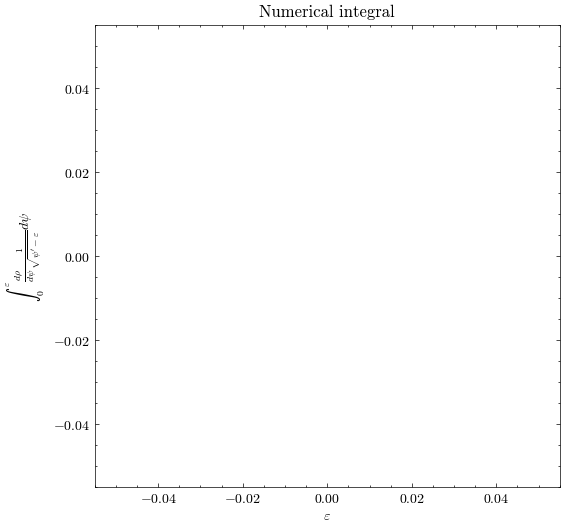

In [86]:
fig = plt.figure(figsize=(6,6))

plt.plot(eps_max,integral)
#plt.scatter(eps_integral,integral)
#plt.loglog()
plt.xlabel(r'$\varepsilon$')
plt.ylabel(r"$\int_0^{\varepsilon} \frac{d\rho}{d\psi}\frac{1}{\sqrt{\psi'-\varepsilon}} d\psi$")

plt.title('Numerical integral')